In [38]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import os
os.getcwd()
os.chdir("C:\\Users\cathy\OneDrive\Documents\STAT399")

In [6]:
# Read in the data
data = pd.read_csv('creditcard.csv')

### Data Cleaning

In [7]:
# First five rows of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape

(284807, 31)

In [9]:
# Check if data has null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values in the dataset.

In [10]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# Check if data has duplicated rows
print(data.duplicated().sum())
# See the duplicates
data.loc[data.duplicated(keep = False)]

1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [12]:
# Drop duplicates
df = data.copy()
df.drop_duplicates(inplace=True)
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

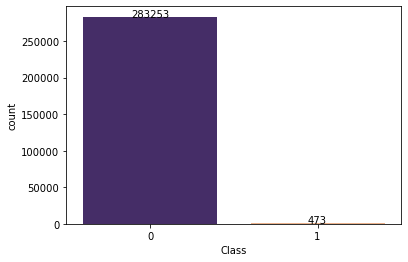

In [13]:
# Plotting the class distribution
ax = sns.countplot(x = 'Class', data = df, palette=['#432371',"#FAAE7B"])

for i in ax.patches:
    height = i.get_height()
    ax.text(x = i.get_x() + (i.get_width()/2),
           y = height+0.2,
           s = '{:.0f}'.format(height),
           ha = 'center')

### Split dataset into train and test

In [15]:
x = df.iloc[:, 1:30]
y = df.iloc[:, 30:31]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.25)

### EDA

In [17]:
train = pd.concat([x_train, y_train], axis=1, join = 'inner')

In [18]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
272388,-0.674882,1.319801,-1.913689,-2.611756,1.854628,-1.224952,1.250989,0.125311,-0.477594,-2.670442,...,0.058281,0.041021,-0.754794,-0.263869,1.563819,0.133730,-0.227265,-0.144567,3.92,0
173736,1.985945,-0.451960,-0.192567,0.497602,-0.850656,-0.528742,-0.680461,-0.026477,1.284732,0.005544,...,0.163502,0.707178,0.176571,0.041409,-0.299696,0.572447,-0.016007,-0.048187,5.74,0
216771,-0.316246,1.219322,-0.857002,-0.798684,1.793765,-1.331096,1.438172,-0.455614,-0.278359,-1.582274,...,0.227150,0.908656,-0.280359,-0.547260,-0.346407,-0.369616,-0.062886,0.036719,1.00,0
209596,-0.066645,0.208958,-1.601602,0.147598,2.311883,-1.124293,0.927979,-0.517101,0.526335,-1.042947,...,0.014988,0.459631,0.136389,-1.205330,-1.620570,-0.552810,0.068664,0.326926,30.00,0
275217,2.097917,-0.864003,-1.323649,-0.362929,-0.360439,-0.314873,-0.370700,-0.237124,-0.254661,0.761982,...,-0.293328,-0.185468,0.096811,0.535359,0.021785,0.728828,-0.053606,-0.050318,54.45,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212794 entries, 272388 to 46234
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      212794 non-null  float64
 1   V2      212794 non-null  float64
 2   V3      212794 non-null  float64
 3   V4      212794 non-null  float64
 4   V5      212794 non-null  float64
 5   V6      212794 non-null  float64
 6   V7      212794 non-null  float64
 7   V8      212794 non-null  float64
 8   V9      212794 non-null  float64
 9   V10     212794 non-null  float64
 10  V11     212794 non-null  float64
 11  V12     212794 non-null  float64
 12  V13     212794 non-null  float64
 13  V14     212794 non-null  float64
 14  V15     212794 non-null  float64
 15  V16     212794 non-null  float64
 16  V17     212794 non-null  float64
 17  V18     212794 non-null  float64
 18  V19     212794 non-null  float64
 19  V20     212794 non-null  float64
 20  V21     212794 non-null  float64
 21  V22   

### Visualizations

#### Correlation

In [21]:
corr = train.corr()

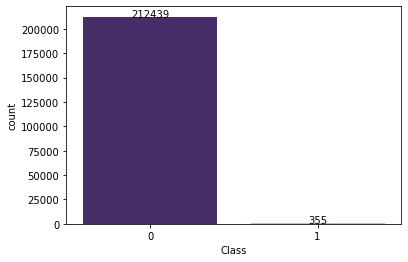

In [22]:
# Plotting the class distribution
ax = sns.countplot(x = 'Class', data = train, palette=['#432371',"#FAAE7B"])

for i in ax.patches:
    height = i.get_height()
    ax.text(x = i.get_x() + (i.get_width()/2),
           y = height+0.2,
           s = '{:.0f}'.format(height),
           ha = 'center')

In [26]:
train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,...,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000,212794.000000
mean,0.007593,-0.004195,0.000688,-0.005245,0.002354,-0.000691,0.002743,-0.001357,-0.002255,-0.000424,...,0.000545,-0.000128,0.000916,0.000296,-0.000034,0.001052,0.000957,0.000557,88.557553,0.001668
std,1.937372,1.638325,1.501030,1.412574,1.353663,1.324204,1.203574,1.181640,1.097286,1.075470,...,0.725703,0.724827,0.624990,0.605616,0.520903,0.483001,0.389270,0.320303,245.729732,0.040811
min,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,-0.915689,-0.602650,-0.892145,-0.851018,-0.691360,-0.768686,-0.553223,-0.209544,-0.645552,-0.534497,...,-0.228170,-0.543018,-0.161710,-0.354146,-0.317394,-0.326322,-0.070908,-0.053126,5.660000,0.000000
50%,0.023095,0.063278,0.178502,-0.023595,-0.053777,-0.275624,0.041402,0.021315,-0.052404,-0.091542,...,-0.029575,0.007256,-0.011091,0.040943,0.016341,-0.051140,0.001173,0.011252,22.000000,0.000000
75%,1.316710,0.801057,1.024314,0.737129,0.613862,0.395042,0.571174,0.325139,0.594786,0.455606,...,0.186230,0.528236,0.147877,0.439394,0.351516,0.240879,0.091030,0.078229,77.750000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,23.745136,...,22.614889,10.503090,22.528412,4.022866,6.070850,3.517346,12.152401,33.847808,18910.000000,1.000000


<AxesSubplot:>

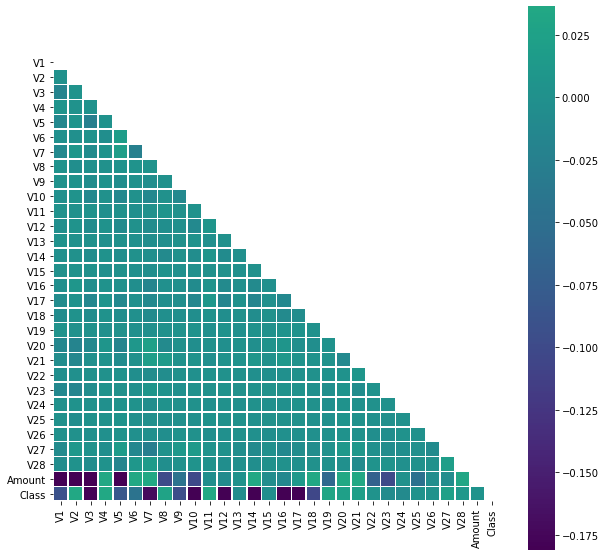

In [27]:
plt.figure(figsize = (10,10))
m = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = m, robust = True, center = 0, square = True, cmap = "viridis", linewidths = 0.6)

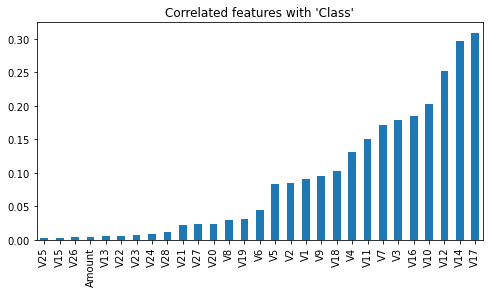

In [28]:
plt.figure(figsize=(8,4))
fig = train.corr()['Class'][:-1].abs().sort_values().plot(kind = 'bar',
                                                    title = "Correlated features with 'Class'")

#### Boxplots

In [29]:
columns = list(train.columns)
columns.remove('Class')

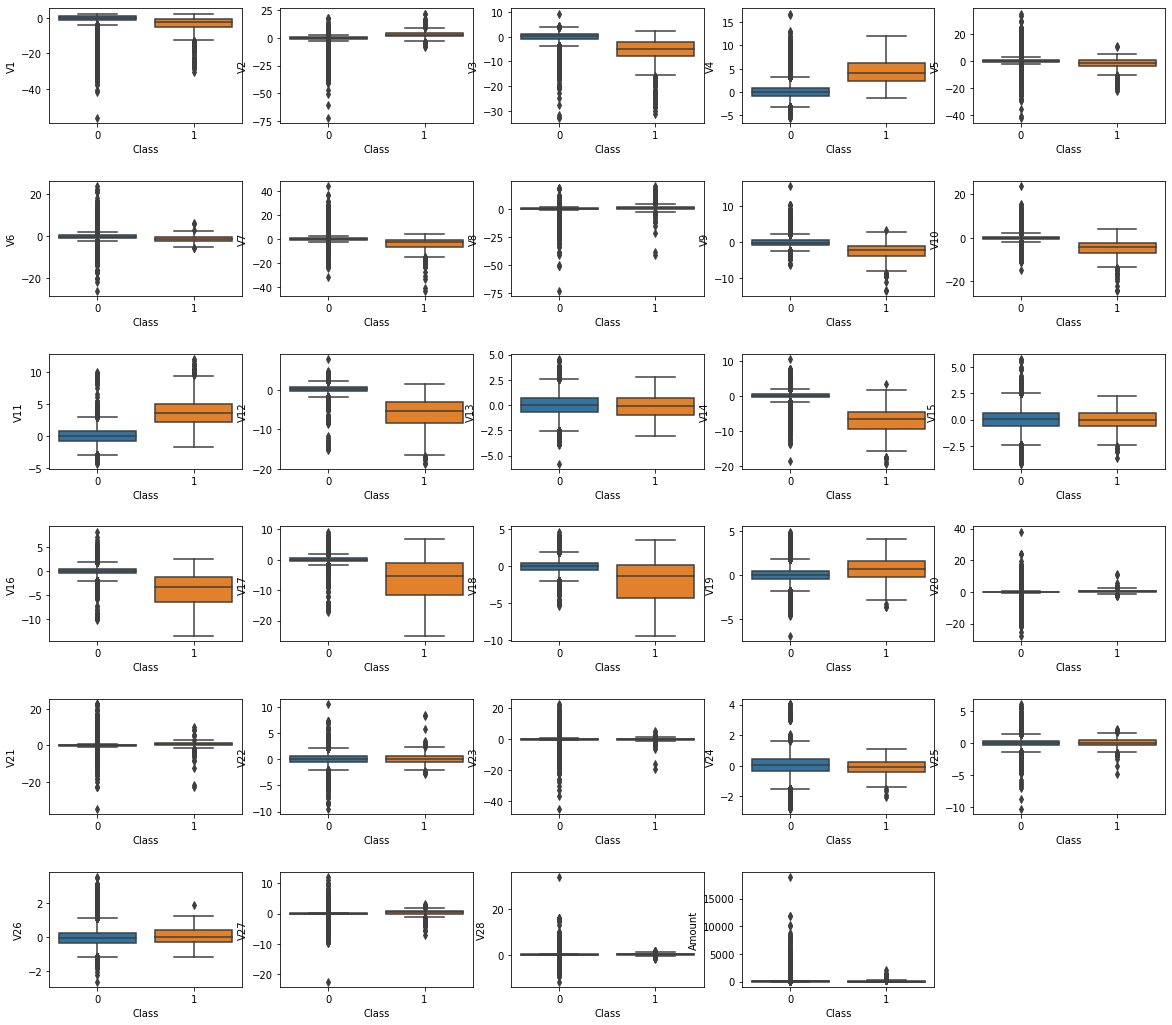

In [30]:
plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(columns):
    ax = plt.subplot(6,5,n+1)
    sns.boxplot(x="Class", y = col, data = train)
    
# plt.savefig('saveboxplots.png')

#### Binning

In [31]:
notfraud = train[train['Class']==0]
fraud = train[train['Class']==1]

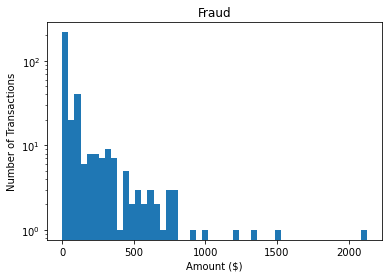

In [34]:
n, bins, patches = plt.hist(x=fraud.Amount, bins=50)
plt.yscale('log')
plt.title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.savefig('binfraud1')

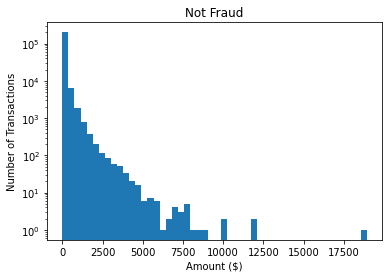

In [36]:
n, bins, patches = plt.hist(x=notfraud.Amount, bins=50)
plt.yscale('log')
plt.title('Not Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.savefig('binfraud2')

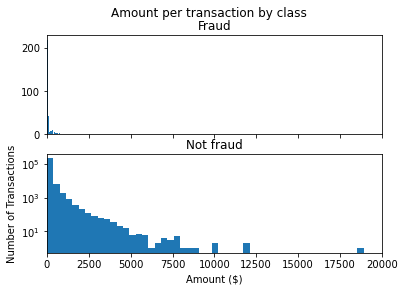

In [37]:
n, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
n.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(notfraud.Amount, bins = bins)
ax2.set_title('Not fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [39]:
# Export train dataset
train.to_csv('train')

In [41]:
test = pd.concat([x_test, y_test], axis=1, join = 'inner')

In [42]:
# Export test dataset
test.to_csv('test')